In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install gplearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
from gplearn.genetic import SymbolicRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [6]:
dataset_survival = pd.read_csv('/home/kidneyData/GP_Survival/dataset_regfinaldata_livingDon_2022_redoMAR30.csv', encoding="latin1", low_memory=False)
dataset_survival.drop(columns=dataset_survival.columns[0], axis=1, inplace=True)
dataset_survival.head(10)

,CAN_LAST_SRTR_PEAK_PRA,DON_RACE,CAN_RACE,CAN_GENDER,DON_GENDER,GL,DAYS,DON_BMI,REC_BMI,REC_AGE_AT_TX,...,REC_AGE_AT_TX_CAT,DON_AGE_CAT,REC_BMI_CAT,DON_BMI_CAT,DON_RELATIONSHIP_TY_CAT,CAN_LAST_SRTR_PEAK_PRA_CAT,AbvMismatch10,AbvMismatch12,Avg_EMS_18,Avg_EMS_30
0,0.000000,Whites,Whites,b'M',b'F',0.0,12342,26.970357,21.077200,30.0,...,< 40,< 40,0-30,0-30,Biological,0-19,<= 10,<= 12,<= 1.8,<= 3.0
1,3.000000,Blacks,Blacks,b'M',b'F',1.0,1123,26.970357,20.136200,24.0,...,< 40,< 40,0-30,0-30,Biological,0-19,<= 10,<= 12,<= 1.8,<= 3.0
2,7.000000,Whites,Blacks,b'F',b'F',0.0,7306,26.970357,20.156200,29.0,...,< 40,< 40,0-30,0-30,Biological,0-19,<= 10,<= 12,<= 1.8,<= 3.0
3,17.000000,Blacks,Blacks,b'F',b'F',1.0,1532,26.970357,35.357100,46.0,...,41 - 60,< 40,> 30,0-30,Biological,0-19,>10,>12,>1.8,>3.0
4,0.000000,Whites,Whites,b'F',b'F',1.0,4885,26.970357,35.380348,31.0,...,< 40,< 40,> 30,0-30,Biological,0-19,>10,>12,>1.8,<= 3.0
5,0.000000,Whites,Whites,b'M',b'M',1.0,883,26.970357,25.912100,28.0,...,< 40,41 - 60,0-30,0-30,Biological,0-19,>10,<= 12,>1.8,>3.0
6,17.870563,Whites,Whites,b'M',b'M',1.0,883,26.970357,27.859900,28.0,...,< 40,> 60,0-30,0-30,Biological,0-19,>10,<= 12,>1.8,>3.0
7,0.000000,Whites,Whites,b'M',b'M',1.0,874,26.970357,25.912100,30.0,...,< 40,41 - 60,0-30,0-30,Biological,0-19,>10,<= 12,>1.8,>3.0
8,17.870563,Whites,Whites,b'M',b'M',1.0,874,26.970357,27.859900,30.0,...,< 40,> 60,0-30,0-30,Biological,0-19,>10,<= 12,>1.8,>3.0
9,0.000000,Whites,Whites,b'M',b'M',1.0,883,26.970357,25.912100,28.0,...,< 40,41 - 60,0-30,0-30,Biological,0-19,>10,<= 12,>1.8,>3.0


In [7]:
dummy_cols = dataset_survival.select_dtypes(include = ['object']).columns.to_list()

In [8]:
train_data = pd.get_dummies(data=dataset_survival, columns=dummy_cols, drop_first = True, dtype = int)
train_data.head(10)

,CAN_LAST_SRTR_PEAK_PRA,GL,DAYS,DON_BMI,REC_BMI,REC_AGE_AT_TX,DON_AGE,Avg_EMS,AbvMismatch,DON_RELATIONSHIP_TY,...,REC_BMI_CAT_> 30,DON_BMI_CAT_> 30,DON_RELATIONSHIP_TY_CAT_Non-Biological,DON_RELATIONSHIP_TY_CAT_Unknown,CAN_LAST_SRTR_PEAK_PRA_CAT_19 - 95,CAN_LAST_SRTR_PEAK_PRA_CAT_> 95,AbvMismatch10_>10,AbvMismatch12_>12,Avg_EMS_18_>1.8,Avg_EMS_30_>3.0
0,0.000000,0.0,12342,26.970357,21.077200,30.0,23.0,0.00000,0,4.0,...,0,0,0,0,0,0,0,0,0,0
1,3.000000,1.0,1123,26.970357,20.136200,24.0,36.0,0.00000,0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,7.000000,0.0,7306,26.970357,20.156200,29.0,22.0,0.00000,0,4.0,...,0,0,0,0,0,0,0,0,0,0
3,17.000000,1.0,1532,26.970357,35.357100,46.0,39.0,12.80500,19,4.0,...,1,0,0,0,0,0,1,1,1,1
4,0.000000,1.0,4885,26.970357,35.380348,31.0,22.0,2.93500,15,4.0,...,1,0,0,0,0,0,1,1,1,0
5,0.000000,1.0,883,26.970357,25.912100,28.0,43.0,4.49375,12,4.0,...,0,0,0,0,0,0,1,0,1,1
6,17.870563,1.0,883,26.970357,27.859900,28.0,69.0,4.49375,12,1.0,...,0,0,0,0,0,0,1,0,1,1
7,0.000000,1.0,874,26.970357,25.912100,30.0,43.0,4.49375,12,4.0,...,0,0,0,0,0,0,1,0,1,1
8,17.870563,1.0,874,26.970357,27.859900,30.0,69.0,4.49375,12,1.0,...,0,0,0,0,0,0,1,0,1,1
9,0.000000,1.0,883,26.970357,25.912100,28.0,43.0,3.41625,12,4.0,...,0,0,0,0,0,0,1,0,1,1


In [9]:
# Create a DataFrame
# df = pd.DataFrame(data)
df = pd.DataFrame(dataset_survival)

In [10]:
df.isnull().sum(axis=1)

0        26
1        25
2        25
3        27
4        25
         ..
93578    16
93579    18
93580    16
93581    16
93582    16
Length: 93583, dtype: int64

In [11]:
df.columns

Index(['CAN_LAST_SRTR_PEAK_PRA', 'DON_RACE', 'CAN_RACE', 'CAN_GENDER',
       'DON_GENDER', 'GL', 'DAYS', 'DON_BMI', 'REC_BMI', 'REC_AGE_AT_TX',
       'DON_AGE', 'Avg_EMS', 'AbvMismatch', 'DON_RELATIONSHIP_TY', 'CAN_ABO',
       'DON_ABO', 'DON_HIST_DIAB', 'CAN_DIAB', 'DON_HTN', 'DON_HIST_HYPERTEN',
       'CAN_DRUG_TREAT_HYPERTEN', 'CAN_PREV_KI', 'DON_TY', 'REC_DIAL_TY',
       'REC_PRETX_DIAL', 'REC_PROD_URINE_GT40_24HRS', 'REC_MALIG',
       'REC_MED_COND', 'REC_MED_COND.1', 'REC_MED_COND.2', 'REC_MED_COND.3',
       'REC_HOSP_90_DAYS', 'REC_TUMOR', 'REC_ORG_RECEIVED_ON',
       'CAN_ANGINA_CAD', 'CAN_ANGINA_CAD.1', 'CAN_ANGINA_CAD.2',
       'CAN_ANGINA_CAD.3', 'CAN_ANGINA_CAD.4', 'CAN_ANGINA_CAD.5',
       'CAN_ANGINA_CAD.6', 'CAN_ANGINA_CAD.7', 'DON_EXPAND_DON_KI',
       'REC_FUNCTN_STAT', 'REC_CMV_STAT', 'CAN_AGE_DIAB', 'CAN_DIAB_TY',
       'REC_COLD_ISCH_TM', 'REC_WARM_ISCH_TM', 'DON_WARM_ISCH_TM_MINS',
       'REC_EBV_STAT', 'REC_HCV_STAT', 'REC_HIV_STAT', 'REC_MED_COND.4',

In [12]:
df = df.fillna(0)  # Replace 0 with any other constant as needed

In [13]:
total_nulls = df.isnull().sum().sum()
print(f"Total null values in the DataFrame: {total_nulls}")

Total null values in the DataFrame: 0


In [14]:
# Define your target variable and features
y = train_data['DAYS']
X = train_data.drop('DAYS', axis=1)

In [15]:
# Initialize the DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=42)

In [16]:
# Fit the model
dtree.fit(X, y)

DecisionTreeRegressor(random_state=42)

In [17]:
# Get feature importances
importances = dtree.feature_importances_

In [18]:
# Create a DataFrame for easier handling
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

In [19]:
# Sort the DataFrame by importance in descending order and select top 5
top_5_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Display the top 5 features
print(top_5_features)

                   Feature    Importance
11       DON_HIST_HYPERTEN  1.899943e+06
90  REC_AGE_AT_TX_CAT_> 60  7.143054e+05
34          REC_MED_COND.5  5.710640e+05
40         DON_RACE_Whites  1.240240e+04
37        CAN_PEPTIC_ULCER  7.751808e+03
9            DON_HIST_DIAB  4.591243e+03
78       REC_CMV_STAT_b'P'  2.968452e+03
0   CAN_LAST_SRTR_PEAK_PRA  7.735602e+02
69     REC_PRETX_DIAL_b'Y'  3.176135e+02
36          REC_MED_COND.7  2.719438e+02


In [20]:
if 'REC_PRETX_DIAL' in df.columns:
    print("Column 'column_name' exists in the DataFrame.")
else:
    print("Column 'column_name' does not exist in the DataFrame.")


Column 'column_name' exists in the DataFrame.


In [21]:
col_name = ['REC_CMV_STAT','DON_HIST_HYPERTEN', 'DON_RACE', 'CAN_LAST_SRTR_PEAK_PRA','REC_AGE_AT_TX_CAT', 'REC_MED_COND.5', 'CAN_PEPTIC_ULCER', 'DON_HIST_DIAB', 'REC_MED_COND.7', 'REC_PRETX_DIAL']
target_col = ['DAYS'] 
X = df[col_name]
y = df[target_col]  # y contains only the 'DAYS' column

x_num = df[col_name].to_numpy()
y_num = df[target_col].to_numpy()  # y contains only the 'DAYS' column

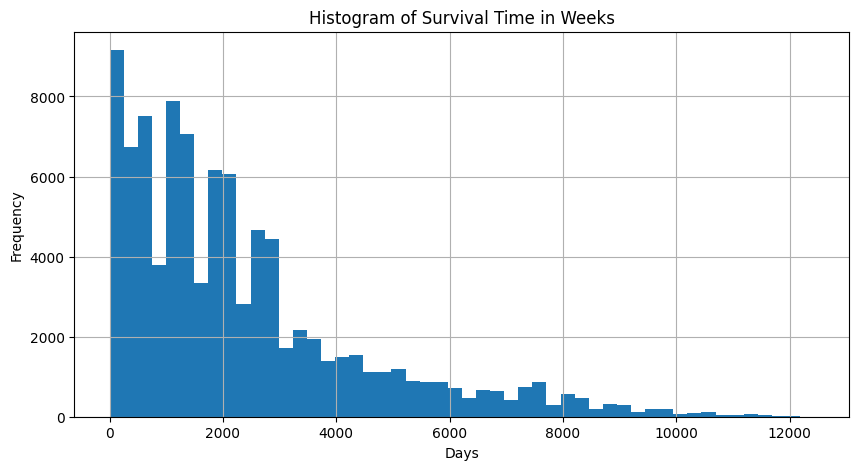

In [22]:
import matplotlib.pyplot as plt

# plot the histogram of the 'WEEKS' column
df[target_col].hist(bins=50, figsize=(10, 5))  # Adjust bins and figsize as needed

# Label your axes and give the plot a title
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Histogram of Survival Time in Weeks')

# Display the plot
plt.show()

/tmp/ipykernel_2882850/1092480990.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DAYS'], hist=False, kde=True,
/home/shresta/.venv/lib/python3.11/site-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


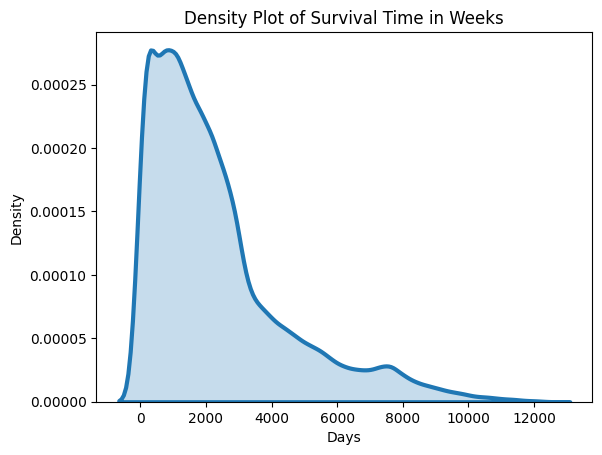

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Using seaborn's distplot function which includes a density plot (kde)
sns.distplot(df['DAYS'], hist=False, kde=True, 
             kde_kws={'shade': True, 'linewidth': 3})

# Alternatively, using pandas to create a density plot
# df['WEEKS'].plot(kind='density', linewidth=2)

# Set labels and title
plt.xlabel('Days')
plt.ylabel('Density')
plt.title('Density Plot of Survival Time in Weeks')

# Display the plot
plt.show()


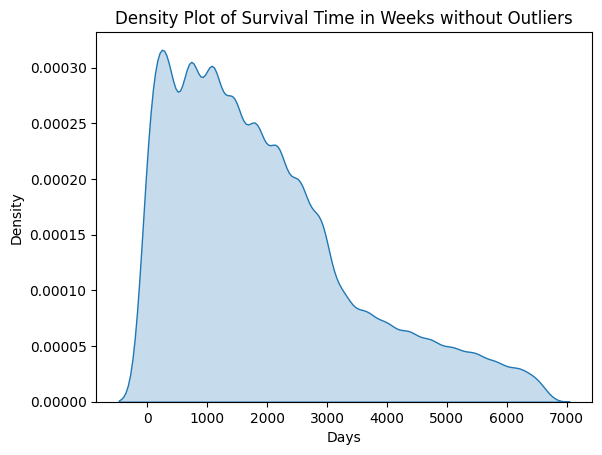

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Q1, Q3 and IQR
Q1 = df['DAYS'].quantile(0.25)
Q3 = df['DAYS'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data
filtered_df = df[(df['DAYS'] >= lower_bound) & (df['DAYS'] <= upper_bound)]

# Plot the filtered data
sns.kdeplot(filtered_df['DAYS'], fill=True)
plt.title('Density Plot of Survival Time in Weeks without Outliers')
plt.xlabel('Days')
plt.ylabel('Density')
plt.show()

In [25]:
#col_name = ['GL','REC_BMI','REC_AGE_AT_TX', 'DON_BMI', 'REC_BMI', 'DON_AGE', 'DON_RACE', 'CAN_RACE']
col_name = ['REC_CMV_STAT','DON_HIST_HYPERTEN', 'DON_RACE', 'CAN_LAST_SRTR_PEAK_PRA','REC_AGE_AT_TX_CAT', 'REC_MED_COND.5', 'CAN_PEPTIC_ULCER', 'DON_HIST_DIAB', 'REC_MED_COND.7', 'REC_PRETX_DIAL']
df['YEARS'] = df['DAYS']/365.0
target_col = ['YEARS']  
X = df[col_name]
y = df[target_col]  # y contains only the 'DAYS' column

In [26]:
# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((74866, 22), (18717, 22), (74866, 1), (18717, 1))

In [28]:
# Train a Random Forest model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

/home/shresta/.venv/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [29]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [30]:
import shap

/home/shresta/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
print(X_train.dtypes)

DON_HIST_HYPERTEN            float64
CAN_LAST_SRTR_PEAK_PRA       float64
REC_MED_COND.5               float64
CAN_PEPTIC_ULCER             float64
DON_HIST_DIAB                float64
REC_MED_COND.7               float64
REC_CMV_STAT_0                  bool
REC_CMV_STAT_b'N'               bool
REC_CMV_STAT_b'ND'              bool
REC_CMV_STAT_b'P'               bool
REC_CMV_STAT_b'U'               bool
DON_RACE_All Others             bool
DON_RACE_Blacks                 bool
DON_RACE_Hisp_L                 bool
DON_RACE_Whites                 bool
REC_AGE_AT_TX_CAT_41 - 60       bool
REC_AGE_AT_TX_CAT_< 40          bool
REC_AGE_AT_TX_CAT_> 60          bool
REC_PRETX_DIAL_0                bool
REC_PRETX_DIAL_b'N'             bool
REC_PRETX_DIAL_b'U'             bool
REC_PRETX_DIAL_b'Y'             bool
dtype: object


In [32]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.fillna(0)  # Replace missing values if any remain


In [35]:
# Identify and convert boolean columns to float64
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype('float64')

# Verify the conversion
print(X.dtypes)


REC_CMV_STAT               object
DON_HIST_HYPERTEN         float64
DON_RACE                   object
CAN_LAST_SRTR_PEAK_PRA    float64
REC_AGE_AT_TX_CAT          object
REC_MED_COND.5            float64
CAN_PEPTIC_ULCER          float64
DON_HIST_DIAB             float64
REC_MED_COND.7            float64
REC_PRETX_DIAL             object
dtype: object


In [36]:
# Identify and convert object columns to float64
object_cols = X.select_dtypes(include=['object']).columns

# Convert each column to numeric, coercing errors
X[object_cols] = X[object_cols].apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0 (or any other appropriate value)
X = X.fillna(0)

# Verify the conversion
print(X.dtypes)


REC_CMV_STAT              float64
DON_HIST_HYPERTEN         float64
DON_RACE                  float64
CAN_LAST_SRTR_PEAK_PRA    float64
REC_AGE_AT_TX_CAT         float64
REC_MED_COND.5            float64
CAN_PEPTIC_ULCER          float64
DON_HIST_DIAB             float64
REC_MED_COND.7            float64
REC_PRETX_DIAL            float64
dtype: object


/tmp/ipykernel_2882850/1844754803.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[object_cols] = X[object_cols].apply(pd.to_numeric, errors='coerce')


/home/shresta/.venv/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
100%|===================| 18667/18717 [06:01<00:00]        

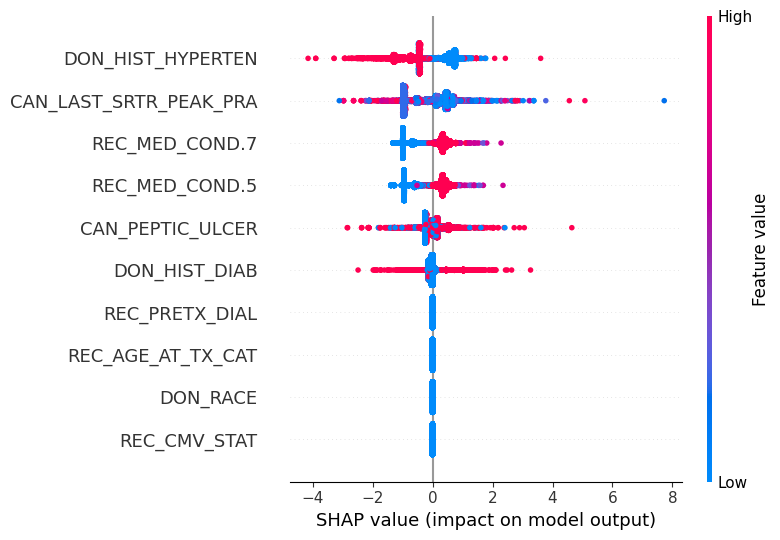

In [43]:
# Identify object columns
object_cols = X.select_dtypes(include=['object']).columns

# Handle non-numeric data
for col in object_cols:
    # Example: Mapping yes/no to 1/0
    if set(X[col].unique()).issubset({'yes', 'no'}):
        X[col] = X[col].map({'yes': 1, 'no': 0})
    else:
        # Convert to numeric, coercing errors
        X[col] = pd.to_numeric(X[col], errors='coerce')

# Fill missing values
X = X.fillna(0)

# Ensure all data is numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# SHAP analysis
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Visualizations
shap.summary_plot(shap_values, X_test)
